In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2025-11-09'
stock = 'GOOG'

data = yf.download(stock,start,end)

/tmp/ipython-input-3417398626.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [3]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.460485,16.528267,16.137910,16.152011,147611217
2012-01-04,16.531481,16.580214,16.341993,16.451085,114989399
2012-01-05,16.302168,16.424865,16.233398,16.379349,131808205
2012-01-06,16.079777,16.326655,16.074086,16.305627,108119746
2012-01-09,15.398015,16.005071,15.367587,15.992700,233776981
...,...,...,...,...,...
2025-11-03,284.119995,285.940002,280.369995,282.420013,19691800
2025-11-04,278.059998,281.834015,276.864990,277.065002,18123700


In [4]:
data.reset_index(inplace=True)

In [5]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.460485,16.528267,16.137910,16.152011,147611217
1,2012-01-04,16.531481,16.580214,16.341993,16.451085,114989399
2,2012-01-05,16.302168,16.424865,16.233398,16.379349,131808205
3,2012-01-06,16.079777,16.326655,16.074086,16.305627,108119746
4,2012-01-09,15.398015,16.005071,15.367587,15.992700,233776981
...,...,...,...,...,...,...
3479,2025-11-03,284.119995,285.940002,280.369995,282.420013,19691800
3480,2025-11-04,278.059998,281.834015,276.864990,277.065002,18123700
3481,2025-11-05,284.750000,286.700012,277.880005,279.380005,20063200


In [6]:
ma_100_days = data.Close.rolling(100).mean()

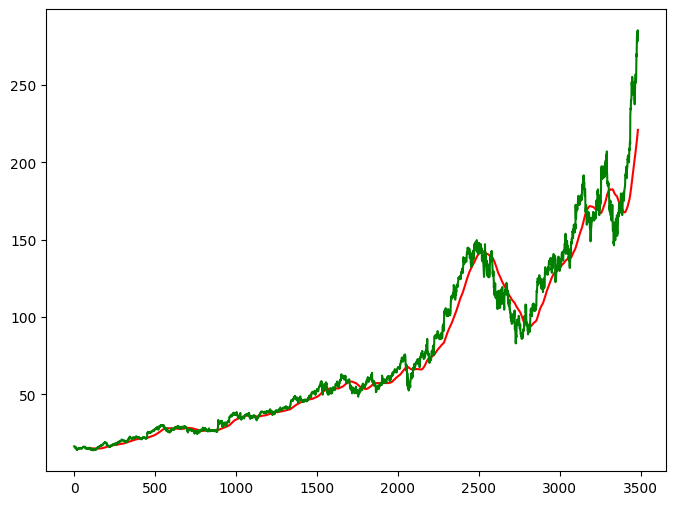

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

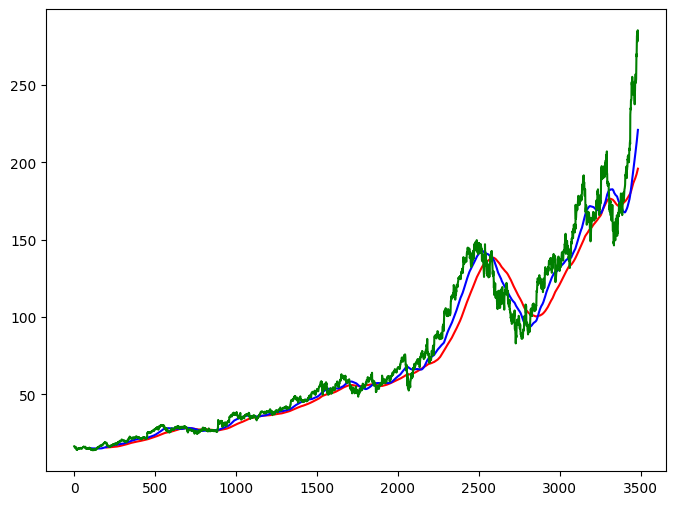

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days,'r')
plt.plot(ma_100_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0 : int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [12]:
data_train.shape[0]

2787

In [13]:
data_test.shape[0]

697

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [18]:
x,y = np.array(x),np.array(y)

In [17]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50,activation='relu',return_sequences=True,input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [23]:
model.fit(x,y,epochs=50, batch_size=32, verbose=1)

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 322ms/step - loss: 0.0591
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 44s 358ms/step - loss: 0.0056
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 30s 353ms/step - loss: 0.0070
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 27s 327ms/step - loss: 0.0052
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 41s 326ms/step - loss: 0.0038
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 29s 341ms/step - loss: 0.0044
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 40s 334ms/step - loss: 0.0032
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 29s 339ms/step - loss: 0.0046
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 31s 374ms/step - loss: 0.0033
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 40s 358ms/step - loss: 0.0035
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 29s 346ms/step - loss: 0.0026
Epoch 12/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 28s 340ms/step - loss: 0.0029
Epoch 13/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 28s 335ms/step - loss: 0.0028
Epoch 14/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 28s 334ms/step - loss: 0.0024
Epoch 15/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 27s 

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [25]:
pas_100_days = data_train.tail(100)

In [26]:
data_test = pd.concat([pas_100_days,data_test],ignore_index=True)

In [27]:
data_test

Ticker,GOOG
0,109.729095
1,108.676308
2,111.020264
3,111.109642
4,104.594223
...,...
792,284.119995
793,278.059998
794,284.750000
795,285.339996


In [28]:
data_test_scale = scaler.fit_transform(data_test)

In [30]:
x = []
y = []

for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x,y = np.array(x),np.array(y)


In [31]:
y_predict = model.predict(x)

22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step


In [35]:
scale = 1/scaler.scale_

In [36]:
y_predict = y_predict*scale

In [37]:
y = y*scale

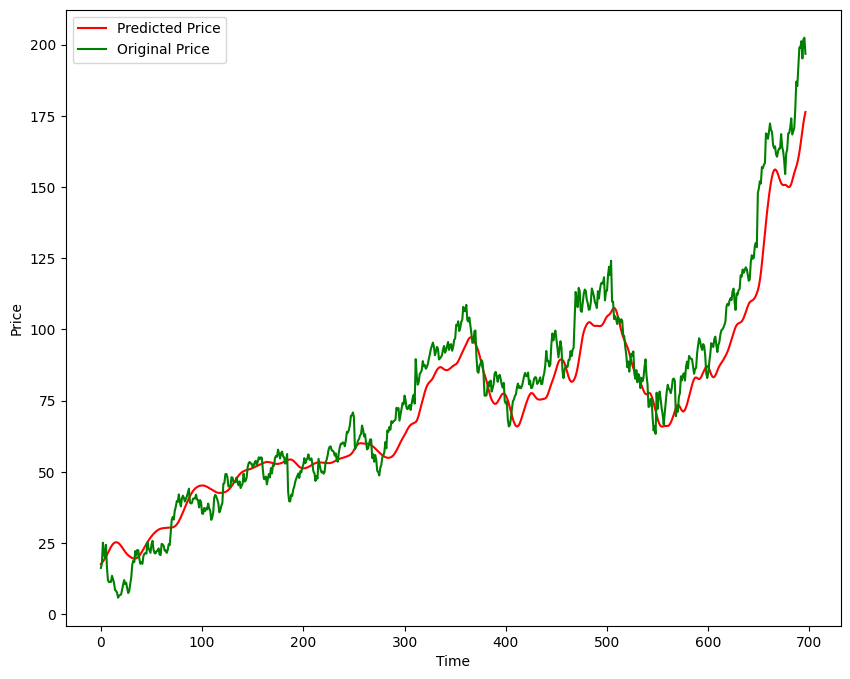

In [38]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [39]:
model.save('Stock Prediction Model.keras')